# Carga de datos "HVAC"

In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt

In [2]:
mainpath = "../Datasets/"
filename = "HVAC.xlsx"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_excel(fullpath, "HISTORICO_DATOS")
data

,Fecha- hora de lectura,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,PERIODO P6,CONTROL FRÍO,CONTROL CALOR,CAPACIDAD BOMBA CALOR FELIPE %,...,SECUNDARIO FRÍO 1,SECUNDARIO FRÍO 2,SECUNDARIO FRÍO 3,IMPULSIÓN SECUNDARIO CALOR,MODO INVIERNO BC1,MODO INVIERNO BC2,SECUNDARIO CALOR 1,SECUNDARIO CALOR 2,SECUNDARIO CALOR 3,ORDEN
0,2016-01-01 00:00:00,0.783603,38.338665,232.182602,235.755234,557.290039,0.000000,26.984179,34.337925,4.266667,...,0.0,0.0,7.954935,22.497906,0,0,100.0,100.0,100.000000,35433
1,2016-01-01 00:15:00,0.926969,38.338665,197.970230,113.384056,372.547760,0.866667,26.805664,34.337925,0.000000,...,0.0,0.0,0.588573,22.497906,0,0,-25.0,-25.0,-25.000000,35441
2,2016-01-01 00:30:00,0.793163,38.455196,211.676941,236.968918,469.299347,1.000000,26.055836,34.337925,0.000000,...,0.0,0.0,0.000000,22.288696,0,0,-25.0,-25.0,-25.000000,35442
3,2016-01-01 00:45:00,0.860073,38.688263,206.066818,298.481995,570.994995,1.000000,25.266325,34.337925,0.000000,...,0.0,0.0,0.000000,22.273752,0,0,-25.0,-25.0,-25.000000,35443
4,2016-01-01 01:00:00,0.812257,38.688263,193.984100,292.789215,563.804016,1.000000,25.605207,34.330490,0.000000,...,0.0,0.0,0.000000,22.408245,0,0,-25.0,-25.0,-25.000000,35444
5,2016-01-01 01:15:00,0.888717,38.688263,190.300995,279.843140,553.907654,1.000000,26.717415,34.330490,0.000000,...,0.0,0.0,0.000000,22.617455,0,0,-25.0,-25.0,-25.000000,35445
6,2016-01-01 01:30:00,0.802738,38.688263,176.961700,292.683258,533.081726,1.000000,28.336132,34.300755,0.000000,...,0.0,0.0,0.000000,22.766891,0,0,-25.0,-25.0,-25.000000,35446
7,2016-01-01 01:45:00,0.831385,38.688263,176.713120,269.536377,522.341614,1.000000,29.540056,34.256153,0.000000,...,0.0,0.0,0.000000,22.946217,0,0,-25.0,-25.0,-25.000000,35447
8,2016-01-01 02:00:00,0.802729,38.688263,176.003754,241.409500,512.430237,1.000000,30.624674,34.236099,0.000000,...,0.0,0.0,0.000000,22.946217,0,0,-25.0,-25.0,-25.000000,35448
9,2016-01-01 02:15:00,0.898297,38.688263,177.443466,202.532761,470.506317,1.000000,31.644857,34.207573,0.000000,...,0.0,0.0,0.000000,22.946217,0,0,-25.0,-25.0,-25.000000,35449


## Variables eliminadas por no ser necesarias

In [4]:
data2 = data
variables_a_eliminar = ["C_O_P_ BOMBA CALOR FELIPE", "C_O_P_ BOMBA CALOR CARLOS",
                        "C_O_P_ INSTALACIÓN GRUPO FRÍO 1", "C_O_P_ INSTALACÍON GRUPO FRÍO 2",
                        "ORDEN", "VÁLVULA BY PASS SECUNDARIO FRÍO",
                        "TEMPERATURA CONTROL DE BY PASS SECUNDARIO", "SECUNDARIO FRÍO 1",
                        "SECUNDARIO FRÍO 2", "SECUNDARIO FRÍO 3", "MODO INVIERNO BC1", 
                        "MODO INVIERNO BC2", "PERIODO P6", "CONTROL CALOR", 
                        "CAPACIDAD BOMBA CALOR FELIPE %", "CAPACIDAD BOMBA CALOR CARLOS %",
                        "CAPACIDAD GRUPO DE FRÍO 1"," CAPACIDAD GRUPO DE FRÍO 2",
                        "IMPULSIÓN SECUNDARIO CALOR", "SECUNDARIO CALOR 1", 
                        "SECUNDARIO CALOR 2", "SECUNDARIO CALOR 3"]
lista_variables = data2.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]
data2 = data2[subLista]
data2.describe()

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,POTENCIA BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR FELIPE,...,C_O_P MÁQUINA GRUPO FRÍO 1,C_O_P MÁQUINA GRUPO FRÍO 2,C_O_P BOMBA CALOR CARLOS,C_O_P BOMBA CALOR FELIPE,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,...,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,7.928500e+04,79285.000000
mean,21.263587,29.153558,318.143167,348.748790,767.229633,8.943993,32.952675,33.616413,22.312328,20.941832,...,3.060061,5.193729,1.603675,1.360955,29.447289,27.899720,113632.621253,98875.029377,8.206856e+04,84085.364562
std,29.226093,20.322527,109.800553,173.801800,308.224618,7.620269,45.304465,43.907480,5.375236,5.262494,...,45.129189,63.743173,2.059181,1.884063,13.676912,13.937344,128906.154196,125502.269258,1.014195e+05,101157.202135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,2.820000,20.617067,230.915283,161.846664,459.953339,0.000000,0.640000,0.480000,18.950001,18.000000,...,0.000000,0.000000,0.000000,0.000000,16.940001,14.794000,8493.352539,3639.967773,0.000000e+00,0.000000
50%,9.016216,26.100000,347.246704,404.859985,866.000549,12.690000,0.700000,0.500000,22.110001,21.309999,...,0.000000,1.000000,0.000000,0.000000,34.740002,28.799999,40299.847656,21060.041016,1.935001e+04,24750.005859
75%,23.946667,34.566841,408.166656,475.656067,1016.214844,14.010000,66.543999,67.599998,25.799999,24.110001,...,4.264040,4.277048,3.689127,3.273391,42.450001,41.980000,220046.687500,195520.031250,1.484000e+05,142400.000000
max,227.385345,246.656601,565.151428,854.659973,1569.602173,102.169998,157.706665,164.206665,38.669998,36.257999,...,2521.533447,3772.673828,74.741554,95.940002,47.889999,47.889999,509556.656250,509729.968750,2.040950e+06,354950.031250


### Cantidad de valores nulos por variable

In [5]:
data3 = data2[data2 != 0]
pd.isnull(data3).sum()

Fecha- hora de lectura                            0
POTENCIA TRAFO 2                                563
POTENCIA TRAFO 3                                493
POTENCIA TRAFO 4                               1042
POTENCIA TRAFO 5                                517
POTENCIA MEDIA CONECTADA                        182
CONTROL FRÍO                                  30610
POTENCIA BOMBA CALOR FELIPE                     855
POTENCIA BOMBA CALOR CARLOS                     855
TEMPERATURA AMBIENTE BOMBA CALOR CARLOS         855
TEMPERATURA AMBIENTE BOMBA CALOR FELIPE         855
TEMPERATURA EXTERIOR                          15362
CAPACIDAD GRUPO DE FRÍO 2                     39079
POTENCIA GRUPO FRÍO 1                           995
POTENCIA GRUPO FRÍO 2                          1090
ENTRADA AGUA A TORRE 1                        25914
SALIDA AGUA TORRE 1                           26524
ENTRADA AGUA A TORRE 2                        25915
SALIDA AGUA TORRE 2                           26525
C_O_P MÁQUIN

## Resumen estadístico básico de las variables numéricas
- count: numero de elementos no nulos
- mean: promedio (suma de valores / numero de elementos)
- std: desviacion estandar (que tanto se separan los valores del promedio)
- min: valor minimo
- 25%: primer cuartil
- 50%: segundo cuartil
- 75%: tercer cuartil
- max: valor maximo

In [6]:
cuartiles = data3.describe()
cuartiles

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,POTENCIA BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR FELIPE,...,C_O_P MÁQUINA GRUPO FRÍO 1,C_O_P MÁQUINA GRUPO FRÍO 2,C_O_P BOMBA CALOR CARLOS,C_O_P BOMBA CALOR FELIPE,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2
count,78722.000000,78792.000000,78243.000000,78768.000000,79103.000000,48675.000000,78430.000000,78430.000000,78430.000000,78430.000000,...,29954.000000,40712.000000,35438.000000,32855.000000,78430.000000,78430.000000,78175.000000,76756.000000,5.860300e+04,40770.000000
mean,21.415659,29.335971,322.380034,351.037831,768.994873,14.568556,33.311907,33.982880,22.555564,21.170129,...,8.099650,10.114581,3.587883,3.284228,29.768307,28.203867,115246.080922,102132.819638,1.110320e+05,163519.944304
std,29.274846,20.254332,104.167281,172.051692,306.371541,3.555707,45.419193,44.004884,4.870496,4.812757,...,73.144155,88.674833,1.538652,1.499845,13.399286,13.703611,129099.933267,126242.075402,1.034414e+05,83128.585141
min,0.140000,0.020000,1.417423,32.099998,7.882583,2.754000,0.040000,0.026667,1.518667,1.392667,...,0.022308,0.022336,0.013333,0.013333,0.420000,1.166667,216.663330,216.663330,3.999996e+02,449.996002
25%,2.913333,20.700199,238.259995,166.501202,461.924469,13.024667,0.640000,0.480000,19.074833,18.129999,...,4.160000,3.984074,3.145551,2.955196,17.299999,15.100000,8970.000000,4290.000000,7.400007e+03,98450.015625
50%,9.053698,26.100000,349.380280,405.859650,866.903198,13.704000,0.700000,0.500000,22.219999,21.433332,...,4.428161,4.265044,3.769216,3.400000,35.066666,29.260000,41643.273438,23009.972656,9.645000e+04,139600.000000
75%,24.246666,34.646667,408.753723,476.139557,1016.493713,15.231667,67.116669,68.131998,25.889999,24.110001,...,4.660000,4.526667,4.053333,3.684086,42.466667,42.033333,222169.929688,203189.902344,1.878250e+05,237300.000000
max,227.385345,246.656601,565.151428,854.659973,1569.602173,102.169998,157.706665,164.206665,38.669998,36.257999,...,2521.533447,3772.673828,74.741554,95.940002,47.889999,47.889999,509556.656250,509729.968750,2.040950e+06,354950.031250


# Transformación de variables

### Valores atipicos 

        IQR = Q3 - Q1
        q < Q1 - 1.5 * IQR
        q > Q3 + 1.5 * IQR

In [8]:
dataLimpioArr = data3.to_numpy()
cuartilesArr = cuartiles.to_numpy()
size_dataLimpioArr = dataLimpioArr.shape
filas = size_dataLimpioArr[0]
columnas = size_dataLimpioArr[1]
for i in range(columnas-1):
    for j in range(filas):
        q1 = cuartilesArr[4][i]
        q3 = cuartilesArr[6][i]
        iqr = q3 - q1
        extremoIzq = q1 - (1.5 * iqr)
        extremoDer = q3 + (1.5 * iqr)
        if (dataLimpioArr[j][i+1] < extremoIzq):
            dataLimpioArr[j][i+1] = cuartilesArr[1][i]
        if (dataLimpioArr[j][i+1] > extremoDer):
            dataLimpioArr[j][i+1] = cuartilesArr[1][i]
            
namesCol = data3.columns.values
dataSinAtipicos = pd.DataFrame.from_records(dataLimpioArr, columns = namesCol)
promedio = dataSinAtipicos.describe()
promedio

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,POTENCIA BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR FELIPE,...,C_O_P MÁQUINA GRUPO FRÍO 1,C_O_P MÁQUINA GRUPO FRÍO 2,C_O_P BOMBA CALOR CARLOS,C_O_P BOMBA CALOR FELIPE,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2
count,78722.000000,78792.000000,78243.000000,78768.000000,79103.000000,48675.000000,78430.000000,78430.000000,78430.000000,78430.000000,...,29954.000000,40712.000000,35438.000000,32855.000000,78430.000000,78430.000000,78175.000000,76756.000000,58603.000000,40770.000000
mean,12.710581,25.437274,322.380034,351.037831,768.994873,14.005693,33.311907,33.982880,22.529703,21.307315,...,5.191439,5.319872,3.643607,3.356352,29.768307,28.203867,115246.080922,102127.509341,110978.489599,163519.944304
std,12.023414,11.741178,104.167281,172.051692,306.371541,1.535162,45.419193,44.004884,4.815399,4.546208,...,1.522882,2.184623,0.565268,0.444493,13.399286,13.703611,129099.933267,126233.502223,103013.833254,83128.585141
min,0.140000,0.020000,1.417423,32.099998,7.882583,9.790667,0.040000,0.026667,8.860000,9.165334,...,3.410380,3.171449,1.785044,1.862510,0.420000,1.166667,216.663330,216.663330,399.999603,449.996002
25%,2.913333,20.700199,238.259995,166.501202,461.924469,13.030000,0.640000,0.480000,19.083334,18.294334,...,4.286626,4.179000,3.418499,3.141391,17.299999,15.100000,8970.000000,4290.000000,7400.007324,98450.015625
50%,9.053698,26.100000,349.380280,405.859650,866.903198,13.720000,0.700000,0.500000,22.219999,21.400000,...,4.526667,4.413898,3.745406,3.376859,35.066666,29.260000,41643.273438,23009.972656,96450.000000,139600.000000
75%,21.415659,30.917964,408.753723,476.139557,1016.493713,14.682667,67.116669,68.131998,25.830667,24.110001,...,4.829035,4.783192,4.033333,3.651158,42.466667,42.033333,222169.929688,203157.476562,187800.000000,237300.000000
max,56.243523,55.566319,565.151428,854.659973,1569.602173,18.540001,157.706665,164.206665,36.099998,33.066666,...,8.099650,10.114581,5.413333,4.776893,47.889999,47.889999,509556.656250,474023.312500,449950.000000,354950.031250


### Valores nulos

In [9]:
data4 = dataSinAtipicos
data4Arr = data4.to_numpy()
promedioArr = promedio.to_numpy()
size_data4Arr = data4Arr.shape
filas1 = size_data4Arr[0]
columnas1 = size_data4Arr[1]
for i in range(columnas1-1):
    for j in range(filas1):
        if ( math.isnan(data4Arr[j][i+1]) ):
            data4Arr[j][i+1] = promedioArr[1][i]
            
namesCol2 = dataSinAtipicos.columns.values
data5 = pd.DataFrame.from_records(data4Arr, columns = namesCol2)
describeNulls = data5.describe()
data5.describe()

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,POTENCIA BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR FELIPE,...,C_O_P MÁQUINA GRUPO FRÍO 1,C_O_P MÁQUINA GRUPO FRÍO 2,C_O_P BOMBA CALOR CARLOS,C_O_P BOMBA CALOR FELIPE,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2
count,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,...,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000,79285.000000
mean,12.710581,25.437274,322.380034,351.037831,768.994873,14.005693,33.311907,33.982880,22.529703,21.307315,...,5.191439,5.319872,3.643607,3.356352,29.768307,28.203867,115246.080922,102127.509341,110978.489599,163519.944304
std,11.980648,11.704617,103.480501,171.489812,306.019694,1.202846,45.173629,43.766966,4.789364,4.521629,...,0.936038,1.565451,0.377911,0.286132,13.326841,13.629520,128193.028772,124203.888602,88564.360418,59610.483157
min,0.140000,0.020000,1.417423,32.099998,7.882583,9.790667,0.040000,0.026667,8.860000,9.165334,...,3.410380,3.171449,1.785044,1.862510,0.420000,1.166667,216.663330,216.663330,399.999603,449.996002
25%,2.933333,20.770863,240.646667,167.826324,462.619995,13.480000,0.640000,0.480000,19.110001,18.330000,...,4.679659,4.400816,3.643607,3.356352,17.400000,15.220000,9100.009766,4549.996094,23800.009766,137350.000000
50%,9.260000,26.100000,347.246704,404.859985,866.000549,14.005693,0.700000,0.500000,22.316668,21.307315,...,5.191439,5.319872,3.643607,3.356352,34.740002,28.799999,42986.675781,25003.285156,110978.489599,163519.944304
75%,21.415659,30.859093,408.166656,475.656067,1016.214844,14.010000,66.543999,67.599998,25.780001,24.110001,...,5.191439,5.319872,3.660718,3.356352,42.450001,41.980000,220046.687500,195520.000000,148400.000000,163519.944304
max,56.243523,55.566319,565.151428,854.659973,1569.602173,18.540001,157.706665,164.206665,36.099998,33.066666,...,8.099650,10.114581,5.413333,4.776893,47.889999,47.889999,509556.656250,474023.312500,449950.000000,354950.031250


## Analisis de correlacion

Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

    1: Total positive linear correlation.
    0: No linear correlation, the two variables most likely do not affect each other.
    -1: Total negative linear correlation.

In [10]:
correlacion = data5.corr(method = "pearson")
correlacion

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,POTENCIA BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR FELIPE,...,C_O_P MÁQUINA GRUPO FRÍO 1,C_O_P MÁQUINA GRUPO FRÍO 2,C_O_P BOMBA CALOR CARLOS,C_O_P BOMBA CALOR FELIPE,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2
POTENCIA TRAFO 2,1.000000,0.159997,0.486024,0.476723,0.523121,-0.079138,0.139810,0.142682,0.064624,0.140509,...,-0.091380,-0.186567,0.043764,0.032069,0.024178,0.005759,0.145264,0.170035,0.216635,0.157874
POTENCIA TRAFO 3,0.159997,1.000000,0.454359,0.377207,0.443471,-0.159514,0.144351,0.143548,-0.203652,-0.168333,...,-0.120481,-0.157758,0.149691,0.082461,0.208421,0.149664,0.188343,0.181076,0.015266,0.019323
POTENCIA TRAFO 4,0.486024,0.454359,1.000000,0.798513,0.906083,-0.319419,0.297625,0.315069,-0.000397,0.059138,...,-0.169504,-0.295738,0.154091,0.105547,0.130623,0.069090,0.335967,0.337383,0.169626,0.167538
POTENCIA TRAFO 5,0.476723,0.377207,0.798513,1.000000,0.942364,-0.293712,0.499065,0.444018,0.073297,0.139610,...,-0.139923,-0.273648,0.020465,-0.015917,0.042480,0.014984,0.445207,0.519621,0.280194,0.243800
POTENCIA MEDIA CONECTADA,0.523121,0.443471,0.906083,0.942364,1.000000,-0.306782,0.434846,0.416197,0.018779,0.091166,...,-0.169940,-0.288226,0.087862,0.050953,0.098148,0.060189,0.426573,0.465958,0.216082,0.186320
CONTROL FRÍO,-0.079138,-0.159514,-0.319419,-0.293712,-0.306782,1.000000,-0.101158,-0.139352,0.009364,0.003207,...,-0.001534,0.117802,-0.100117,-0.107430,-0.056667,-0.043632,-0.142980,-0.118619,0.095305,0.101722
POTENCIA BOMBA CALOR FELIPE,0.139810,0.144351,0.297625,0.499065,0.434846,-0.101158,1.000000,0.020236,0.000100,-0.068927,...,-0.080398,-0.053680,-0.081934,-0.039307,-0.104520,0.190331,-0.020249,0.949786,-0.000420,-0.049794
POTENCIA BOMBA CALOR CARLOS,0.142682,0.143548,0.315069,0.444018,0.416197,-0.139352,0.020236,1.000000,-0.178404,-0.057080,...,-0.119565,0.036444,-0.034032,-0.037009,0.267723,0.006875,0.958889,-0.004274,-0.107223,-0.162507
TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,0.064624,-0.203652,-0.000397,0.073297,0.018779,0.009364,0.000100,-0.178404,1.000000,0.796274,...,0.058733,0.150337,-0.258665,-0.202646,-0.628606,-0.548851,-0.260436,-0.068360,0.443925,0.285649
TEMPERATURA AMBIENTE BOMBA CALOR FELIPE,0.140509,-0.168333,0.059138,0.139610,0.091166,0.003207,-0.068927,-0.057080,0.796274,1.000000,...,0.059313,0.151514,-0.250066,-0.141400,-0.572547,-0.526513,-0.132499,-0.127711,0.448658,0.261618


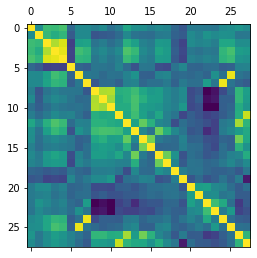

In [11]:
plt.matshow(correlacion)

### Variables con coeficiente de correlacion alto

Text(0.5, 1.0, 'POTENCIA MEDIA CONECTADA vs POTENCIA TRAFO 5')

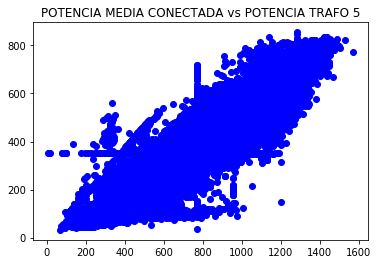

In [12]:
plt.plot(data5["POTENCIA MEDIA CONECTADA"], data5["POTENCIA TRAFO 5"], "bo")
plt.title("POTENCIA MEDIA CONECTADA vs POTENCIA TRAFO 5")

Text(0.5, 1.0, 'KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS vs POTENCIA BOMBA CALOR CARLOS')

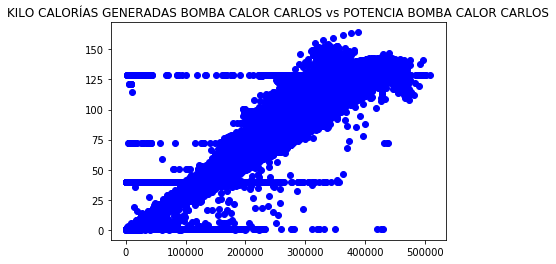

In [13]:
plt.plot(data5["KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS"], data5["POTENCIA BOMBA CALOR CARLOS"], "bo")
plt.title("KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS vs POTENCIA BOMBA CALOR CARLOS")

## Dataset limpio en excel 

In [14]:
writer = pd.ExcelWriter('../Datasets/analisisHVAC.xlsx', engine='xlsxwriter')

cuartiles.to_excel(writer, "describe")
promedio.to_excel(writer, "describeSinAtipicos")
describeNulls.to_excel(writer, "describeSinNulos")
correlacion.to_excel(writer, "correlacion")

writer.save()

In [15]:
data5.to_excel("../Datasets/HVAC_limpio.xlsx", "HVAC_limpio")